In [20]:
import pandas as pd

# List of relevant columns for hip-shoulder separation and contact time
relevant_columns = [
    'session_swing', 'time',
    'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z',
    'rear_hip_angular_velocity_x', 'rear_hip_angular_velocity_y', 'rear_hip_angular_velocity_z',
    'lead_shoulder_angular_velocity_x', 'lead_shoulder_angular_velocity_y', 'lead_shoulder_angular_velocity_z',
    'rear_shoulder_angular_velocity_x', 'rear_shoulder_angular_velocity_y', 'rear_shoulder_angular_velocity_z',
    'torso_angular_velocity_x', 'torso_angular_velocity_y', 'torso_angular_velocity_z',
    'torso_pelvis_angular_velocity_x', 'torso_pelvis_angular_velocity_y', 'torso_pelvis_angular_velocity_z',
    'contact_time'
]

# Filter joint velocities DataFrame
hip_shoulder_data = joint_velos[relevant_columns]

# Remove initial rows where time = 0 and contact_time is missing
hip_shoulder_data = hip_shoulder_data[hip_shoulder_data['time'] != 0]

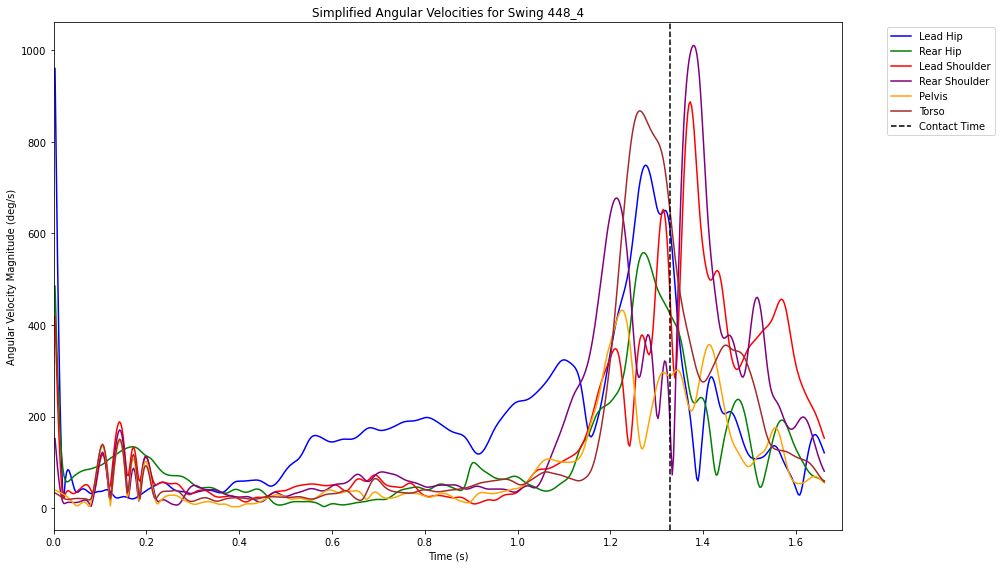

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the magnitude of the angular velocity vectors for each body part
def calculate_magnitude(df, x_col, y_col, z_col):
    return np.sqrt(df[x_col]**2 + df[y_col]**2 + df[z_col]**2)

# Function to plot the simplified angular velocities
def plot_simplified_angular_velocities(swing_data, swing_id):
    contact_time = swing_data['contact_time'].iloc[0]  # Assuming contact time is constant for a swing
    
    # Calculate magnitudes
    lead_hip_magnitude = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
    rear_hip_magnitude = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x', 'rear_hip_angular_velocity_y', 'rear_hip_angular_velocity_z')
    lead_shoulder_magnitude = calculate_magnitude(swing_data, 'lead_shoulder_angular_velocity_x', 'lead_shoulder_angular_velocity_y', 'lead_shoulder_angular_velocity_z')
    rear_shoulder_magnitude = calculate_magnitude(swing_data, 'rear_shoulder_angular_velocity_x', 'rear_shoulder_angular_velocity_y', 'rear_shoulder_angular_velocity_z')
    pelvis_magnitude = calculate_magnitude(swing_data, 'torso_pelvis_angular_velocity_x', 'torso_pelvis_angular_velocity_y', 'torso_pelvis_angular_velocity_z')
    torso_magnitude = calculate_magnitude(swing_data, 'torso_angular_velocity_x', 'torso_angular_velocity_y', 'torso_angular_velocity_z')

    plt.figure(figsize=(14, 8))

    # Plot magnitudes
    plt.plot(swing_data['time'], lead_hip_magnitude, label='Lead Hip', color='blue')
    plt.plot(swing_data['time'], rear_hip_magnitude, label='Rear Hip', color='green')
    plt.plot(swing_data['time'], lead_shoulder_magnitude, label='Lead Shoulder', color='red')
    plt.plot(swing_data['time'], rear_shoulder_magnitude, label='Rear Shoulder', color='purple')
    plt.plot(swing_data['time'], pelvis_magnitude, label='Pelvis', color='orange')
    plt.plot(swing_data['time'], torso_magnitude, label='Torso', color='brown')
    
    # Add vertical line for contact time
    plt.axvline(x=contact_time, color='black', linestyle='--', label='Contact Time')
    
    # Add labels and title
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Velocity Magnitude (deg/s)')
    plt.title(f'Simplified Angular Velocities for Swing {swing_id}')
    
    # Set x-axis limit
    plt.xlim([0, 1.7])
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

    # Show plot
    plt.tight_layout()
    plt.show()

# Filter out initial rows where time = 0 and contact_time is missing
hip_shoulder_data = hip_shoulder_data[hip_shoulder_data['time'] != 0]

# Randomly select and plot a single swing
random_swing_id = np.random.choice(hip_shoulder_data['session_swing'].unique())
swing_data = hip_shoulder_data[hip_shoulder_data['session_swing'] == random_swing_id]
plot_simplified_angular_velocities(swing_data, random_swing_id)

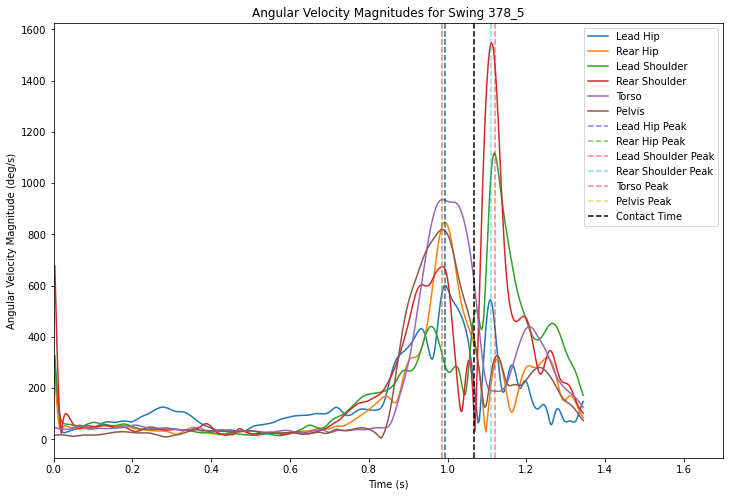

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define a function to calculate the Euclidean norm for angular velocities
def calculate_magnitude(df, x_col, y_col, z_col):
    return np.sqrt(df[x_col]**2 + df[y_col]**2 + df[z_col]**2)

# Define a function to find the highest peak
def find_highest_peak(series):
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(series)
    if len(peaks) == 0:
        return None
    highest_peak = peaks[np.argmax(series.iloc[peaks])]
    return highest_peak

# Define a function to plot the magnitudes of angular velocities with key peak indicators
def plot_magnitude_swing_with_peaks(swing_data, swing_id):
    # Make a copy of the DataFrame slice to avoid SettingWithCopyWarning
    swing_data = swing_data.copy()
    
    # Calculate the magnitudes for each joint
    swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
    swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x', 'rear_hip_angular_velocity_y', 'rear_hip_angular_velocity_z')
    swing_data['lead_shoulder_magnitude'] = calculate_magnitude(swing_data, 'lead_shoulder_angular_velocity_x', 'lead_shoulder_angular_velocity_y', 'lead_shoulder_angular_velocity_z')
    swing_data['rear_shoulder_magnitude'] = calculate_magnitude(swing_data, 'rear_shoulder_angular_velocity_x', 'rear_shoulder_angular_velocity_y', 'rear_shoulder_angular_velocity_z')
    swing_data['torso_magnitude'] = calculate_magnitude(swing_data, 'torso_angular_velocity_x', 'torso_angular_velocity_y', 'torso_angular_velocity_z')
    swing_data['pelvis_magnitude'] = calculate_magnitude(swing_data, 'pelvis_angular_velocity_x', 'pelvis_angular_velocity_y', 'pelvis_angular_velocity_z')

    contact_time = swing_data['contact_time'].iloc[0]  # Assuming contact time is constant for a swing

    # Find the highest peaks for each joint magnitude
    lead_hip_peak = find_highest_peak(swing_data['lead_hip_magnitude'])
    rear_hip_peak = find_highest_peak(swing_data['rear_hip_magnitude'])
    lead_shoulder_peak = find_highest_peak(swing_data['lead_shoulder_magnitude'])
    rear_shoulder_peak = find_highest_peak(swing_data['rear_shoulder_magnitude'])
    torso_peak = find_highest_peak(swing_data['torso_magnitude'])
    pelvis_peak = find_highest_peak(swing_data['pelvis_magnitude'])

    plt.figure(figsize=(12, 8))

    # Plot the magnitudes
    plt.plot(swing_data['time'], swing_data['lead_hip_magnitude'], label='Lead Hip')
    plt.plot(swing_data['time'], swing_data['rear_hip_magnitude'], label='Rear Hip')
    plt.plot(swing_data['time'], swing_data['lead_shoulder_magnitude'], label='Lead Shoulder')
    plt.plot(swing_data['time'], swing_data['rear_shoulder_magnitude'], label='Rear Shoulder')
    plt.plot(swing_data['time'], swing_data['torso_magnitude'], label='Torso')
    plt.plot(swing_data['time'], swing_data['pelvis_magnitude'], label='Pelvis')

    # Plot vertical lines at the highest peak times
    if lead_hip_peak is not None:
        plt.axvline(x=swing_data['time'].iloc[lead_hip_peak], color='b', linestyle='--', alpha=0.5, label='Lead Hip Peak')
    if rear_hip_peak is not None:
        plt.axvline(x=swing_data['time'].iloc[rear_hip_peak], color='g', linestyle='--', alpha=0.5, label='Rear Hip Peak')
    if lead_shoulder_peak is not None:
        plt.axvline(x=swing_data['time'].iloc[lead_shoulder_peak], color='r', linestyle='--', alpha=0.5, label='Lead Shoulder Peak')
    if rear_shoulder_peak is not None:
        plt.axvline(x=swing_data['time'].iloc[rear_shoulder_peak], color='c', linestyle='--', alpha=0.5, label='Rear Shoulder Peak')
    if torso_peak is not None:
        plt.axvline(x=swing_data['time'].iloc[torso_peak], color='m', linestyle='--', alpha=0.5, label='Torso Peak')
    if pelvis_peak is not None:
        plt.axvline(x=swing_data['time'].iloc[pelvis_peak], color='y', linestyle='--', alpha=0.5, label='Pelvis Peak')

    plt.axvline(x=contact_time, color='k', linestyle='--', label='Contact Time')

    plt.xlabel('Time (s)')
    plt.ylabel('Angular Velocity Magnitude (deg/s)')
    plt.title(f'Angular Velocity Magnitudes for Swing {swing_id}')
    plt.legend()
    plt.xlim(0, 1.7)  # Adjust the x-axis limit to 1.7 seconds for better comparison
    plt.show()

# Assuming the DataFrame 'joint_velos' is already defined and contains the necessary columns
# Randomly select a swing and plot it
random_swing_id_1 = np.random.choice(joint_velos['session_swing'].unique())
swing_data_1 = joint_velos[joint_velos['session_swing'] == random_swing_id_1]
plot_magnitude_swing_with_peaks(swing_data_1, random_swing_id_1)

In [23]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

# Function to calculate Euclidean norm
def calculate_magnitude(df, x_col, y_col, z_col):
    return np.sqrt(df[x_col]**2 + df[y_col]**2 + df[z_col]**2)

# Function to find the highest peak and its time
def find_highest_peak(series):
    peaks, _ = find_peaks(series)
    if len(peaks) == 0:
        return None, None
    highest_peak_index = peaks[np.argmax(series.iloc[peaks])]
    return highest_peak_index, series.index[highest_peak_index]

# Function to find and return the order of peaks for a swing
def get_peak_order(swing_data, swing_id):
    # Make a copy of the DataFrame slice to avoid SettingWithCopyWarning
    swing_data = swing_data.copy()
    
    # Calculate the magnitudes for each joint
    swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
    swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x', 'rear_hip_angular_velocity_y', 'rear_hip_angular_velocity_z')
    swing_data['lead_shoulder_magnitude'] = calculate_magnitude(swing_data, 'lead_shoulder_angular_velocity_x', 'lead_shoulder_angular_velocity_y', 'lead_shoulder_angular_velocity_z')
    swing_data['rear_shoulder_magnitude'] = calculate_magnitude(swing_data, 'rear_shoulder_angular_velocity_x', 'rear_shoulder_angular_velocity_y', 'rear_shoulder_angular_velocity_z')
    swing_data['torso_magnitude'] = calculate_magnitude(swing_data, 'torso_angular_velocity_x', 'torso_angular_velocity_y', 'torso_angular_velocity_z')
    swing_data['pelvis_magnitude'] = calculate_magnitude(swing_data, 'pelvis_angular_velocity_x', 'pelvis_angular_velocity_y', 'pelvis_angular_velocity_z')

    # Find the highest peaks for each joint magnitude and their times
    peaks = {}
    peaks['Lead Hip'], _ = find_highest_peak(swing_data['lead_hip_magnitude'])
    peaks['Rear Hip'], _ = find_highest_peak(swing_data['rear_hip_magnitude'])
    peaks['Lead Shoulder'], _ = find_highest_peak(swing_data['lead_shoulder_magnitude'])
    peaks['Rear Shoulder'], _ = find_highest_peak(swing_data['rear_shoulder_magnitude'])
    peaks['Torso'], _ = find_highest_peak(swing_data['torso_magnitude'])
    peaks['Pelvis'], _ = find_highest_peak(swing_data['pelvis_magnitude'])

    peak_times = {k: swing_data['time'].iloc[v] for k, v in peaks.items() if v is not None}
    sorted_peaks = sorted(peak_times.items(), key=lambda item: item[1])

    return sorted_peaks

# Assuming the DataFrame 'joint_velos' is already defined and contains the necessary columns

# Calculate the order of peaks for a sample of 50 swings
all_peak_orders = []
unique_swings = joint_velos['session_swing'].unique()

# Randomly select 50 unique swings
sample_swings = np.random.choice(unique_swings, 50, replace=False)

for swing_id in sample_swings:
    swing_data = joint_velos[joint_velos['session_swing'] == swing_id]
    peak_order = get_peak_order(swing_data, swing_id)
    all_peak_orders.append({'swing_id': swing_id, 'peak_order': peak_order})

# Convert the results to a DataFrame for further analysis
peak_orders_df = pd.DataFrame(all_peak_orders)

# Analyze the peak order data
print(peak_orders_df)

# Save the results to a CSV file for further analysis
peak_orders_df.to_csv('swing_peak_orders.csv', index=False)

# Calculate the mean order of the body parts
order_counts = {'Lead Hip': [], 'Rear Hip': [], 'Lead Shoulder': [], 'Rear Shoulder': [], 'Torso': [], 'Pelvis': []}

for index, row in peak_orders_df.iterrows():
    for order, (body_part, time) in enumerate(row['peak_order']):
        order_counts[body_part].append(order + 1)

mean_order = {k: np.mean(v) for k, v in order_counts.items()}
mean_order_df = pd.DataFrame(list(mean_order.items()), columns=['Body Part', 'Mean Order'])

# Print the mean order
print(mean_order_df)

# Save the mean order to a CSV file for further analysis
mean_order_df.to_csv('mean_order.csv', index=False)

   swing_id                                         peak_order
0     360_8  [(Lead Hip, 1.4306), (Torso, 1.5528), (Pelvis,...
1     199_7  [(Lead Hip, 1.3444), (Pelvis, 1.3722), (Torso,...
2     358_7  [(Pelvis, 1.1028), (Torso, 1.1083), (Rear Hip,...
3     215_2  [(Rear Hip, 2.6778), (Lead Hip, 2.6806), (Tors...
4     448_7  [(Pelvis, 1.3778), (Rear Hip, 1.3861), (Torso,...
5     291_4  [(Pelvis, 1.2306), (Torso, 1.2472), (Rear Hip,...
6      68_3  [(Lead Hip, 1.9444), (Torso, 2.0), (Pelvis, 2....
7     349_3  [(Rear Hip, 1.6417), (Pelvis, 1.6417), (Torso,...
8     363_5  [(Pelvis, 1.7361), (Rear Hip, 1.7417), (Lead H...
9     203_1  [(Torso, 1.225), (Rear Hip, 1.2278), (Pelvis, ...
10    398_2  [(Pelvis, 1.5056), (Rear Hip, 1.5139), (Torso,...
11    383_2  [(Pelvis, 1.375), (Rear Hip, 1.3778), (Torso, ...
12    360_6  [(Lead Hip, 1.225), (Pelvis, 1.35), (Rear Hip,...
13    282_8  [(Pelvis, 1.9194), (Torso, 1.9306), (Rear Hip,...
14    490_7  [(Pelvis, 1.4139), (Rear Hip, 1.425), (Tor

In [24]:
import pandas as pd
import numpy as np

def calculate_magnitude(df, x_col, y_col, z_col):
    return np.sqrt(df[x_col]**2 + df[y_col]**2 + df[z_col]**2)

def get_order_counts(data, n_swings=50):
    order_counts = {
        'Lead Hip': [],
        'Rear Hip': [],
        'Lead Shoulder': [],
        'Rear Shoulder': [],
        'Torso': [],
        'Pelvis': []
    }

    for i in range(n_swings):
        # Select a random swing
        swing_id = np.random.choice(data['session_swing'].unique())
        swing_data = data[data['session_swing'] == swing_id]

        # Calculate magnitudes for each body part
        swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
        swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x', 'rear_hip_angular_velocity_y', 'rear_hip_angular_velocity_z')
        swing_data['lead_shoulder_magnitude'] = calculate_magnitude(swing_data, 'lead_shoulder_angular_velocity_x', 'lead_shoulder_angular_velocity_y', 'lead_shoulder_angular_velocity_z')
        swing_data['rear_shoulder_magnitude'] = calculate_magnitude(swing_data, 'rear_shoulder_angular_velocity_x', 'rear_shoulder_angular_velocity_y', 'rear_shoulder_angular_velocity_z')
        swing_data['torso_magnitude'] = calculate_magnitude(swing_data, 'torso_angular_velocity_x', 'torso_angular_velocity_y', 'torso_angular_velocity_z')
        swing_data['pelvis_magnitude'] = calculate_magnitude(swing_data, 'torso_pelvis_angular_velocity_x', 'torso_pelvis_angular_velocity_y', 'torso_pelvis_angular_velocity_z')

        # Get peak times for each body part
        peaks = {
            'Lead Hip': swing_data['lead_hip_magnitude'].idxmax(),
            'Rear Hip': swing_data['rear_hip_magnitude'].idxmax(),
            'Lead Shoulder': swing_data['lead_shoulder_magnitude'].idxmax(),
            'Rear Shoulder': swing_data['rear_shoulder_magnitude'].idxmax(),
            'Torso': swing_data['torso_magnitude'].idxmax(),
            'Pelvis': swing_data['pelvis_magnitude'].idxmax()
        }

        # Sort by peak time
        sorted_peaks = sorted(peaks, key=peaks.get)
        
        # Record order counts
        for idx, part in enumerate(sorted_peaks):
            order_counts[part].append(idx + 1)

    return order_counts

# Assuming 'hip_shoulder_data' is your dataset
order_counts = get_order_counts(hip_shoulder_data, n_swings=50)

# Calculate the mean order and standard deviation of the order for each body part
order_stats = {k: {'Mean Order': np.mean(v), 'Standard Deviation': np.std(v)} for k, v in order_counts.items()}
order_stats_df = pd.DataFrame(order_stats).T

# Print the mean order and standard deviation
print(order_stats_df)

# Save the order statistics to a CSV file for further analysis
order_stats_df.to_csv('order_stats.csv')

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x'

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x'

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x'

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['rear_shoulder_magnitude'] = calculate_magnitude(swing_data, 'rear_shoulder_angular_velocity_x', 'rear_shoulder_angular_velocity_y', 'rear_shoulder_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['torso_magnitude'] = calculate_magnitude(swing_data, 'torso_angul

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['torso_magnitude'] = calculate_magnitude(swing_data, 'torso_angular_velocity_x', 'torso_angular_velocity_y', 'torso_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['pelvis_magnitude'] = calculate_magnitude(swing_data, 'torso_pelvis_angular_velocity_x', 'torso_p

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['pelvis_magnitude'] = calculate_magnitude(swing_data, 'torso_pelvis_angular_velocity_x', 'torso_pelvis_angular_velocity_y', 'torso_pelvis_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_v

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x', 'rear_hip_angular_velocity_y', 'rear_hip_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['lead_shoulder_magnitude'] = calculate_magnitude(swing_data, 'lead_shoulder_angular_v

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x'

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x'

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x'

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x'

/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x'

               Mean Order  Standard Deviation
Lead Hip             3.46            1.445130
Rear Hip             2.86            1.249160
Lead Shoulder        3.92            1.968146
Rear Shoulder        4.78            1.404137
Torso                2.86            1.020000
Pelvis               3.12            2.045874


/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['lead_hip_magnitude'] = calculate_magnitude(swing_data, 'lead_hip_angular_velocity_x', 'lead_hip_angular_velocity_y', 'lead_hip_angular_velocity_z')
/var/folders/7y/f82vz5x92fgdw0ldp3bznq780000gn/T/ipykernel_1769/1081281683.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data['rear_hip_magnitude'] = calculate_magnitude(swing_data, 'rear_hip_angular_velocity_x'